Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | <p style="text-align: left">Matr.-No.</p> |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">*Cesar Miguel*</p>| <p style="text-align: left">*Valdez Cordova*</p> | <p style="text-align: left">*K12046803*</p>  |
| <p style="text-align: left">*Ionelia*</p>| <p style="text-align: left">*Buzatu*</p> | <p style="text-align: left">*k12008243*</p>  |


<h2 style="text-align: center">344.063: Special Topics - Natural Language Processing with Deep Learning (SS2022)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1: Open</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-dummy"><li style="font-size:large;font-weight:bold">Task A: Collection Processing and Dummy Baseline (10 points)</li></a>
    <a href="#section-model1"><li style="font-size:large;font-weight:bold">Task B: Implementation of Model I (15 points)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective
This Notebook provide a general instruction for the Open assignment. This Notebook should encompas all aspects of the assignment such as the implemented codes and reports. The cells can contains code, reports, charts, tables, or any other material, required for the assignment. Cover the questions/points, mentioned in the tasks, but also add any necessary point for understanding your experiments. Try to provide the solutions in a clear, and visual way! 

Please discuss any unclear point in the assignment with the author(s) of the assignment.

</div>

<div style="background-color:rgb(224, 243, 255)">

### Selected NLP Task and Test Collection 

In this assignment, you can approach any natural language processing task, such as text summarization, question answering, machine translation, etc. To do the assignment, you should first select an **available standard test collection** for the task of your choice. A standard test collection means a dataset that provides training/validation/test sets, and has clearly defined methods/metrics for performance evaluation. Examples of such collections are the ones in various ML challenges (e.g. in Kaggle).

If you have any doubts or questions about the selected collection, feel free to resolve it with the lecturer(s) and tutor(s): <navid.rekabsaz@jku.at>, <shahed.masoudian@jku.at>
</div>

<div style="background-color:rgb(224, 243, 255)">

### Libraries

The assignment should be implemented with recent versions of `Python` (>3.7) and `PyTorch` (>1.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `transformer`, `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<div style="background-color:rgb(224, 243, 255)">

### Publishing Experiments Results

It is encouraged that you log and store any information about the training and evaluation of the models in an ML dashboard like [`TensorBoard`](https://www.tensorflow.org/tensorboard) or [`wandb`](https://wandb.ai/site). This can contain any important aspect of training such as the changes in the evaluation results on validation, training loss, or learning rate. 

To this end, in the case of `TensorBoard`, after finalizing all experiments and cleaning any unnecessary experiment, publish the log files results through [`TensorBoard.dev`](https://tensorboard.dev). A simple way of doing it is by running the following command in the folder of log files:

`tensorboard dev upload --name my_exp --logdir path/to/output_dir`

`TensorBoard.dev` uploads the necessary files and provides a URL to see the TensorBoard's console. Insert the URL in the cell below.

</div>


**URL :** *EDIT!*

<a name="section-dummy"></a><h2 style="color:rgb(0,120,170)">Task A: Collection Processing and Dummy Baseline (10 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

The objective of this task is to load and process the collection, to implement a simple dummy baseline, followed by its evaulation. Indeed, the actual functionality of each part depends on the selected collection. However, the following general steps are expected in the provided solution. 

**Loading the collection and preprocessing the data (2 point).** 

**Defining a dummy baseline and training it (2 point):** A dummy baseline can be any non-deep-learning model, which is considered as a weak baseline for further comparisons. This model can be a classical machine learning algorithm (like by using linear regression), or even the models that ignore input features such as the ones in [`DummyClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html).

**Evaluation (2 point).**

**Overall functionality (2 point).**

**Reporting (2 point):** During loading and processing the collection, provide sufficient information and examples about the data and the applied processing steps. Report the evaluation results of the baseline model on the validation and test set in a table.

</div>

In [1]:
from huggingmolecules import MatModel, MatFeaturizer, MatConfig

import sys
import getpass
whoami = getpass.getuser()
print(f"user: {whoami}")

# The following import works only from the source code directory:
USERS_PATH_TO_REPO = {'semibah': '/home/semibah/huggingmolecules', 'ionelia': '/home/ionelia/pycharm-projects/huggingmolecules', 'other_user': 'please fill in here path'}
try:
    sys.path.append(USERS_PATH_TO_REPO[whoami])
except KeyError:
    raise("who are you? - add your username to the dict above.")
    
from experiments.src import TrainingModule, get_data_loaders
from experiments.src.training import training_metrics

import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import torch
import torch.nn as nn
import torchmetrics
from torch.nn import MSELoss, CrossEntropyLoss, BCEWithLogitsLoss
from torch.optim import Adam
import torch.nn.utils.prune as prune

from torchinfo import summary
from tdc.utils import retrieve_label_name_list
from typing import Tuple, List, Optional, Any
import inspect

from pytorch_lightning import Trainer
from pytorch_lightning.metrics import MeanSquaredError, Metric
from pytorch_lightning.metrics.functional.classification import auroc

from tdc.single_pred import ADME
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# the models used in task A
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesRegressor

from pprint import pprint

user: semibah


In [2]:
print(torch.cuda.is_available())
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  
device = torch.device(dev)  

True


An important task in drug discovery is determining a drug’s ADME properties. ADME is an acronym that stands for  “Absorption, distribution, metabolism and excretion” and partly describes how a molecule with determined pharmaceutical properties is metabolized within an organism [1]. Absorption in particular measures how a drug travels from the site of administration to the site of action and as such, is an interesting property to research for drug development purposes. Multiple subtasks encompass molecular absorption and can be solved in both regression and classification settings. 

Given the notebook’s open objectives, we chose one regression and one classification task and their associated datasets, both of which deal with molecular absorption: Human Intestinal Absorption (HIA) HIA and The Free Solvation Database’s FreeSolv which are briefly explained and detailed before their corresponding code cells [2][3]. Said datasets and associated base models for task A were obtained from the Therapeutic Data Commons, an open science AI/ML initiative and utilized as follows [4].

Our dummy baseline for the regression and classification cases are a linear regression and tree regression model, respectively. Our evaluations, functionality and reporting are described in their respective codelbocks. For simplicity, we load the datasets required for task A directly from the TDC portal directly.


In [3]:
# some functions we will need later

def drug_descriptors(drugs):
    """
    used to preprocess drug discovery data. this kind of data comes as a string format
    and here we extract information of each drug with the help of rdkit package. 
    each desciptor is an attribute of the drug e.g. the pH and, 
    all together, those attributes form the input for the model for a single sample.
    """
    
    def descriptors_array(mol):
        descriptors = np.array(get_descriptors.ComputeProperties(mol))
        return descriptors
    
    if isinstance(drugs, str):
        mol = Chem.MolFromSmiles(drug)
        drug_descriptors = []
        if mol:
            drug_descriptors = descriptors_array(mol) 
        return drug_descriptors
    else:
        dataset_descriptors = []
        for drug in drugs:
            mol = Chem.MolFromSmiles(drug)
            descriptors = descriptors_array(mol)
            if len(descriptors):
                dataset_descriptors.append(descriptors)
        return dataset_descriptors  
    
def regression_task(model, x_train, y_train, x_test, y_test):
    """
    train a regression model.
    return: the mean absolute error of the testset. 
    """
    model.fit(x_train, y_train)
    y_pred = model.predict(x_freesolv_test)
    mean_absolute_error = mae(y_test, y_pred)
    return mean_absolute_error

### Classification task

**HIA is a classification task and stands for human intestinal absorption.**

**Dataset Description**: When a drug is orally administered, it needs to be absorbed from the human gastrointestinal
system into the bloodstream of the human body. This ability of absorption is called human intestinal absorption
(HIA) and it is crucial for a drug to be delivered to the target.

**Task Description**: Binary classification. Given a drug SMILES string, predict the activity of HIA.

**Dataset Statistics**: 578 drugs.

**Suggested data split**: scaffold split.

**Evaluation Metric**: AUROC.

In [3]:
# loading classification data and split it into train, validation and test.
data_hia = ADME(name = 'HIA_Hou')
split_data_hia = data_hia.get_split(method='scaffold', frac=[0.7, 0.1, 0.2])
hia_train, hia_valid, hia_test = split_data_hia['train'], split_data_hia['valid'], split_data_hia['test']

Downloading...
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40.1k/40.1k [00:00<00:00, 14.0MiB/s]
Loading...
Done!
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 578/578 [00:00<00:00, 2266.32it/s]


this is an example of the molecular stracture of a drug. the SMILE is the string format describing the drawing below:


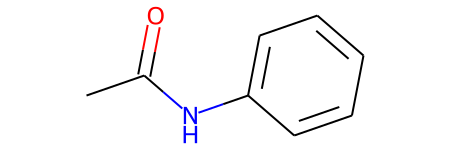

In [4]:
descriptor_names = list(Chem.rdMolDescriptors.Properties.GetAvailableProperties())
get_descriptors = Chem.rdMolDescriptors.Properties(descriptor_names)
mol = Chem.MolFromSmiles(hia_train.Drug[0])
print("this is an example of the molecular stracture of a drug. the SMILE is the string format describing the drawing below:")
mol 

In [5]:
descriptors = np.array(get_descriptors.ComputeProperties(mol))
descriptor_names # each drug comes with a vector of attributes, the names below.

['exactmw',
 'lipinskiHBA',
 'lipinskiHBD',
 'NumRotatableBonds',
 'NumHBD',
 'NumHBA',
 'NumHeteroatoms',
 'NumAmideBonds',
 'FractionCSP3',
 'NumRings',
 'NumAromaticRings',
 'NumAliphaticRings',
 'NumSaturatedRings',
 'NumHeterocycles',
 'NumAromaticHeterocycles',
 'NumSaturatedHeterocycles',
 'NumAliphaticHeterocycles',
 'NumSpiroAtoms',
 'NumBridgeheadAtoms',
 'NumAtomStereoCenters',
 'NumUnspecifiedAtomStereoCenters',
 'labuteASA',
 'tpsa',
 'CrippenClogP',
 'CrippenMR']

In [6]:
# preprocess the data.
x_hia_train, x_hia_valid, x_hia_test = drug_descriptors(hia_train.Drug), drug_descriptors(hia_valid.Drug), drug_descriptors(hia_test.Drug)

In [7]:
lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=False, shrinkage=None, tol=1)
lda.fit(x_hia_train, hia_train.Y)
print(f"Accuracy classification **validation set**: {acc(hia_valid.Y, lda.predict(x_hia_valid)):.3f}")

Accuracy classification **validation set**: 0.877


In [8]:
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'store_covariance': [True, False]
     }
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv=6, scoring='accuracy')
grid

GridSearchCV(cv=6, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'store_covariance': [True, False]},
             scoring='accuracy')

In [9]:
results = grid.fit(x_hia_train, hia_train.Y)
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
print(f"Accuracy classification **validation set** after grid search: {acc(hia_valid.Y, grid.best_estimator_.predict(x_hia_valid)):.3f}")

Mean Accuracy: 0.926
Config: {'solver': 'svd', 'store_covariance': True}
Accuracy classification **validation set** after grid search: 0.895


In [10]:
best_model = grid.best_estimator_
print(f"Accuracy classification task **test set**: {acc(hia_test.Y, best_model.predict(x_hia_test)):.3f}")

Accuracy classification task **test set**: 0.855


### Regression task freesolv

**Dataset Description**: The Free Solvation Database, FreeSolv(SAMPL), provides experimental and calculated hydration free energy of small molecules in water. The calculated values are derived from alchemical free energy calculations using molecular dynamics simulations. From MoleculeNet.

**Task Description**: Regression. Given a drug SMILES string, predict the activity of hydration free energy.

**Dataset Statistics**: 642 drugs.

**Evaluation Metric**: mean absolute error

In [11]:
data_freesolv = ADME(name = 'hydrationfreeenergy_freesolv')
split_data_freesolv = data_freesolv.get_split(method='scaffold', frac = [0.7, 0.1, 0.2])
freesolv_train, freesolv_valid, freesolv_test = split_data_freesolv['train'], split_data_freesolv['valid'], split_data_freesolv['test']

Downloading...
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29.0k/29.0k [00:00<00:00, 4.48MiB/s]
Loading...
Done!
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 642/642 [00:00<00:00, 7231.09it/s]


In [12]:
x_freesolv_train, x_freesolv_valid, x_freesolv_test = drug_descriptors(freesolv_train.Drug), drug_descriptors(freesolv_valid.Drug), drug_descriptors(freesolv_test.Drug)

In [13]:
model = ExtraTreesRegressor(criterion="mae", n_estimators=5)
model.fit(x_freesolv_train, freesolv_train.Y)
print(f"mean absolue error regression task on **validation set**: {mae(freesolv_valid.Y, model.predict(x_freesolv_valid)):.3f}")

mean absolue error regression task on **validation set**: 1.718


In [14]:
param_grid = {
    'n_estimators': [2, 50, 100],
    'bootstrap': [True, False]
}

kf = KFold(n_splits=3, random_state=0)
grid = GridSearchCV(ExtraTreesRegressor(criterion="mae"), param_grid, cv=kf, scoring='neg_mean_absolute_error')
grid                 

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=False),
             estimator=ExtraTreesRegressor(criterion='mae'),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [2, 50, 100]},
             scoring='neg_mean_absolute_error')

In [15]:
results = grid.fit(x_freesolv_train, freesolv_train.Y)
print('Mean absolute error: %.3f' % abs(results.best_score_))
print('Config: %s' % results.best_params_)
print(f"mean absolue error regression task on **validation set** after grid search: {mae(freesolv_valid.Y, grid.best_estimator_.predict(x_freesolv_valid)):.3f}")

Mean absolute error: 1.052
Config: {'bootstrap': False, 'n_estimators': 50}
mean absolue error regression task on **validation set** after grid search: 1.460


In [16]:
best_model = grid.best_estimator_
print(f"mean absolue error regression task on **test set**: {mae(freesolv_test.Y, best_model.predict(x_freesolv_test)):.3f}")

mean absolue error regression task on **test set**: 0.992


### **Report Results Task A**

| dataset | metric | validation | test |
|---|:---|:---:|:---:
| HIA (classification) | AUROC | 0.930 | 0.872
| freesolv (regression) | MAE | 1.170 | 1.107

<a name="section-model1"></a><h2 style="color:rgb(0,120,170)">Task B: Implementation of `Model I` (15 points)</li></a></h2>


The objective of this task is to implement the first deep learning model, referred to as `Model I`, together with some architectural variations of this model. The task should cover the following points:

**Implementing `Model I` (7 points):** The model can use any of the architectures discussed in the course such as CNNs, RNNs, Attention Networks, Transformers, pretrained Large LMs.

**Model variations (6 points):** Implement **three variations** of `Model I`. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. A variation can be a change in for instance the architecture (like number of layers, size of the embeddings, architecture-specific variants, etc.), optimization methods, or regularization approaches. The code of all variations should be inside the code of `Model I`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 


**Reporting and discussion (2 points):** Report the evaluation results of all the variations in a table and also in a plot, accompanied with the result of the dummy baseline. Discuss which variation(s) appear to be the most effective one(s). Explain your take.


</div>

The model we chose for the implementation of task B is the Molecule Attention Transformer (MAT), as facilitated by the HuggingMolecules library [5][6]. Briefly, MAT mirrors the original transformer architecture albeit with distinct changes in the encoder [7]; it expressly accounts for the handling of molecular data which makes it an ideal candidate to use with the aforementioned datasets. To this goal, the Transformer’s Multi-Head Self-Attention is extended to Molecule Multi-Head Self-Attention, which has three components that capture molecular information to aid in transformer training and prediction: molecular distance, adjacency and per-node attention. This sets a straightforward setting for evaluation of architectural modifications. 

Our goal with the implementation of task B is partly understanding causality in MAT’s architecture through the elimination or “ablation” of each of the Molecule Multi-Head Self-Attention components, one at a time, to determine which of these components aids the most in prediction in both regression and classification settings [8]. Our 4 models will then be, the base MAT model with all 3 components which corresponds to Model I, fine-tuned to both FreeSolv and HIA, while the 3 remaining Model I variations will remove one of the aforementioned components at a time: Distance, Adjacency and Self-Attention node components, and subsequently be fine-tuned, with two remaining components, to both the FreeSolv regression and HIA classification tasks. Conveniently, huggingmolecules provides an interface, in the form of specific dataloaders but otherwise identical to those in the TDC portal for task A, to both of our chosen datasets in addition to different versions of pre-trained MAT which we use throughout implementation B below.


In [4]:
freesolv_featurizer = MatFeaturizer.from_pretrained('mat_masking_200k')
freesolv_train, freesolv_valid, freesolv_test = get_data_loaders(freesolv_featurizer,
                                          batch_size=32,
                                          task_name='ADME',
                                          dataset_name='hydrationfreeenergy_freesolv')

Found local copy...
Loading...
Done!


In [5]:
# Build and load the pre-trained model and the appropriate featurizer:
freesolv_base_model = MatModel.from_pretrained('mat_masking_200k')
freesolv_ft_model = MatModel.from_pretrained('mat_masking_200k')
freesolv_featurizer = MatFeaturizer.from_pretrained('mat_masking_200k')

# Build the pytorch lightning training module:
freesolv_ft_pl_module = TrainingModule(freesolv_ft_model,
                           loss_fn=MSELoss(),
                           metric_cls=MeanSquaredError,
                           optimizer=Adam(freesolv_ft_model.parameters()))

# Build the pytorch lightning trainer  
freesolv_trainer = Trainer(gpus=-1, auto_select_gpus=True, max_epochs=100)

## Load corresponding metrics; Regression task metric: RMSE, Classification task metric: ROCAUC
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)

GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [22]:
## Load datsets
freesolv_train, freesolv_valid, freesolv_test = get_data_loaders(freesolv_featurizer,
                                          batch_size=32,
                                          task_name='ADME',
                                          dataset_name='hydrationfreeenergy_freesolv')

Found local copy...
Loading...
Done!


In [23]:
#Finetuned (Reference)
freesolv_trainer.fit(freesolv_ft_pl_module, train_dataloader=freesolv_train, val_dataloaders=freesolv_valid)


  | Name    | Type     | Params
-------------------------------------
0 | model   | MatModel | 42 M  
1 | loss_fn | MSELoss  | 0     
INFO:lightning:
  | Name    | Type     | Params
-------------------------------------
0 | model   | MatModel | 42 M  
1 | loss_fn | MSELoss  | 0     


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

1

In [24]:
#Finetuned predictions
freesolv_ft_preds = []
freesolv_ft_targets = []

for batch_idx , sample in enumerate(freesolv_test):
    outputs = freesolv_ft_pl_module.model(sample).to(device)
    y = sample.y.to(device)
    freesolv_ft_preds.append(outputs)
    freesolv_ft_targets.append(y)
    
freesolv_ft_preds = torch.cat(freesolv_ft_preds)
freesolv_ft_targets = torch.cat(freesolv_ft_targets)
freesolv_ft_score = rmse(freesolv_ft_preds, freesolv_ft_targets)
print(freesolv_ft_score)

tensor(1.1788, device='cuda:0', grad_fn=<SqueezeBackward0>)


In [25]:
#Ablating node feature component

# Build and load the pre-trained model. Re-utilizing past featurizer.
freesolv_no_node_model = MatModel.from_pretrained('mat_masking_200k')

for i in range(0,len(freesolv_no_node_model.encoder.layers)):
    prune.ln_structured(freesolv_no_node_model.encoder.layers[i].self_attn.linear_layers[0], 'weight', amount=1.0, n=float(), dim=0)
    
# Build the pytorch lightning training module:
freesolv_no_node_pl_module = TrainingModule(freesolv_no_node_model,
                           loss_fn=MSELoss(),
                           metric_cls=MeanSquaredError,
                           optimizer=Adam(freesolv_no_node_model.parameters()))

# Build the pytorch lightning trainer  
freesolv_no_node_trainer = Trainer(gpus=-1, auto_select_gpus=True, max_epochs=100)
#Pretrained (Reference)
freesolv_no_node_trainer.fit(freesolv_no_node_pl_module, train_dataloader=freesolv_train, val_dataloaders=freesolv_valid)

GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type     | Params
-------------------------------------
0 | model   | MatModel | 42 M  
1 | loss_fn | MSELoss  | 0     
INFO:lightning:
  | Name    | Type     | Params
-------------------------------------
0 | model   | MatModel | 42 M  
1 | loss_fn | MSELoss  | 0     


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

1

In [26]:
#No node feature component predictions
freesolv_nod_preds = []
freesolv_nod_targets = []

for batch_idx , sample in enumerate(freesolv_test):
    outputs = freesolv_no_node_pl_module.model(sample).to(device)
    y = sample.y.to(device)
    freesolv_nod_preds.append(outputs)
    freesolv_nod_targets.append(y)
    
freesolv_nod_preds = torch.cat(freesolv_nod_preds)
freesolv_nod_targets = torch.cat(freesolv_nod_targets)
freesolv_nod_score = rmse(freesolv_nod_preds, freesolv_nod_targets)
print(freesolv_nod_score)

tensor(1.4976, device='cuda:0', grad_fn=<SqueezeBackward0>)


In [27]:
#Ablating adjacency component

# Build and load the pre-trained model. Re-utilizing past featurizer.
freesolv_no_adjacency_model = MatModel.from_pretrained('mat_masking_200k')

for i in range(0,len(freesolv_no_adjacency_model.encoder.layers)):
    prune.ln_structured(freesolv_no_adjacency_model.encoder.layers[i].self_attn.linear_layers[1], 
                        'weight', amount=1.0, n=float(), dim=0)
    
# Build the pytorch lightning training module:
freesolv_no_adjacency_pl_module = TrainingModule(freesolv_no_adjacency_model,
                           loss_fn=MSELoss(),
                           metric_cls=MeanSquaredError,
                           optimizer=Adam(freesolv_no_adjacency_model.parameters()))

# Build the pytorch lightning trainer  
freesolv_no_adjacency_trainer = Trainer(gpus=-1, auto_select_gpus=True, max_epochs=100)
#Pretrained (Reference)
freesolv_no_adjacency_trainer.fit(freesolv_no_adjacency_pl_module, 
                                  train_dataloader=freesolv_train, 
                                  val_dataloaders=freesolv_valid)

GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type     | Params
-------------------------------------
0 | model   | MatModel | 42 M  
1 | loss_fn | MSELoss  | 0     
INFO:lightning:
  | Name    | Type     | Params
-------------------------------------
0 | model   | MatModel | 42 M  
1 | loss_fn | MSELoss  | 0     


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

1

In [28]:
#Ablated adjacency component predictions
freesolv_noadj_preds = []
freesolv_noadj_targets = []

for batch_idx , sample in enumerate(freesolv_test):
    outputs = freesolv_no_adjacency_pl_module.model(sample).to(device)
    y = sample.y.to(device)
    freesolv_noadj_preds.append(outputs)
    freesolv_noadj_targets.append(y)
    
freesolv_noadj_preds = torch.cat(freesolv_noadj_preds)
freesolv_noadj_targets = torch.cat(freesolv_noadj_targets)
freesolv_noadj_score = rmse(freesolv_noadj_preds, freesolv_noadj_targets)
print(freesolv_noadj_score)

tensor(2.4059, device='cuda:0', grad_fn=<SqueezeBackward0>)


In [6]:
#Ablating distance component

# Build and load the pre-trained model. Re-utilizing past featurizer.
freesolv_no_dist_model = MatModel.from_pretrained('mat_masking_200k')

for i in range(0,len(freesolv_no_dist_model.encoder.layers)):
    prune.ln_structured(freesolv_no_dist_model.encoder.layers[i].self_attn.linear_layers[2], 'weight', amount=1.0, n=float(), dim=0)
    
# Build the pytorch lightning training module:
freesolv_no_dist_pl_module = TrainingModule(freesolv_no_dist_model,
                           loss_fn=MSELoss(),
                           metric_cls=MeanSquaredError,
                           optimizer=Adam(freesolv_no_dist_model.parameters()))

# Build the pytorch lightning trainer  
freesolv_no_dist_trainer = Trainer(gpus=-1, auto_select_gpus=True, max_epochs=100)
#Pretrained (Reference)
freesolv_no_dist_trainer.fit(freesolv_no_dist_pl_module, train_dataloader=freesolv_train, val_dataloaders=freesolv_valid)

GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type     | Params
-------------------------------------
0 | model   | MatModel | 42 M  
1 | loss_fn | MSELoss  | 0     
INFO:lightning:
  | Name    | Type     | Params
-------------------------------------
0 | model   | MatModel | 42 M  
1 | loss_fn | MSELoss  | 0     


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

1

In [7]:
#Ablated distance component predictions
freesolv_nodist_preds = []
freesolv_nodist_targets = []

for batch_idx , sample in enumerate(freesolv_test):
    outputs = freesolv_no_dist_pl_module.model(sample).to(device)
    y = sample.y.to(device)
    freesolv_nodist_preds.append(outputs)
    freesolv_nodist_targets.append(y)
    
freesolv_nodist_preds = torch.cat(freesolv_nodist_preds)
freesolv_nodist_targets = torch.cat(freesolv_nodist_targets)
freesolv_nodist_score = rmse(freesolv_nodist_preds, freesolv_nodist_targets)
print(freesolv_nodist_score)

tensor(1.6379, device='cuda:0', grad_fn=<SqueezeBackward0>)


## HIA

In [3]:
# Build and load the pre-trained model and the appropriate featurizer:
hia_base_model = MatModel.from_pretrained('mat_masking_200k')
hia_ft_model = MatModel.from_pretrained('mat_masking_200k')
hia_featurizer = MatFeaturizer.from_pretrained('mat_masking_200k')

# Build the pytorch lightning training module:
hia_ft_pl_module = TrainingModule(hia_ft_model,
                           loss_fn=BCEWithLogitsLoss(),
                           metric_cls=training_metrics.AUROC,
                           optimizer=Adam(hia_ft_model.parameters()))

# Build the pytorch lightning trainer  
hia_trainer = Trainer(gpus=-1, auto_select_gpus=True, max_epochs=100)

## Load corresponding metrics; Classification task metric: ROCAUC
rocauc = torchmetrics.AUROC(num_classes=None).to(device)

GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [4]:
hia_train, hia_valid, hia_test = get_data_loaders(hia_featurizer,
                                          batch_size=32,
                                          task_name='ADME',
                                          dataset_name='HIA_Hou') 

Found local copy...
Loading...
Done!
[20:54:53] UFFTYPER: Unrecognized charge state for atom: 6
RDKit ERROR: [20:54:53] UFFTYPER: Unrecognized charge state for atom: 6
[20:54:53] UFFTYPER: Unrecognized charge state for atom: 6
RDKit ERROR: [20:54:53] UFFTYPER: Unrecognized charge state for atom: 6


In [11]:
# Fine-tuned on HIA
hia_trainer.fit(hia_ft_pl_module, train_dataloader=hia_train, val_dataloaders=hia_valid)


  | Name    | Type              | Params
----------------------------------------------
0 | model   | MatModel          | 42 M  
1 | loss_fn | BCEWithLogitsLoss | 0     
INFO:lightning:
  | Name    | Type              | Params
----------------------------------------------
0 | model   | MatModel          | 42 M  
1 | loss_fn | BCEWithLogitsLoss | 0     


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

1

In [12]:
#Finetuned predictions
hia_ft_preds = []
hia_ft_targets = []

for batch_idx , sample in enumerate(hia_test):
    outputs = hia_ft_pl_module.model(sample).to(device)
    y = sample.y.to(device)
    hia_ft_preds.append(outputs)
    hia_ft_targets.append(y)
    
hia_ft_preds = torch.cat(hia_ft_preds)
hia_ft_targets = torch.cat(hia_ft_targets).int()
hia_ft_score = rocauc(hia_ft_preds, hia_ft_targets)
#hia_ft_score = AUROC(hia_ft_preds, hia_ft_targets)
print(hia_ft_score)

tensor(0.9647, device='cuda:0')


In [13]:
#Ablating node feature component

# Build and load the pre-trained model. Re-utilizing past featurizer.
hia_no_node_model = MatModel.from_pretrained('mat_masking_200k')

for i in range(0,len(hia_no_node_model.encoder.layers)):
    prune.ln_structured(hia_no_node_model.encoder.layers[i].self_attn.linear_layers[0], 'weight', amount=1.0, n=float(), dim=0)
    
# Build the pytorch lightning training module:
hia_no_node_pl_module = TrainingModule(hia_no_node_model,
                           loss_fn=BCEWithLogitsLoss(),
                           metric_cls=training_metrics.AUROC,
                           optimizer=Adam(hia_no_node_model.parameters()))

# Build the pytorch lightning trainer  
hia_no_node_trainer = Trainer(gpus=-1, auto_select_gpus=True, max_epochs=100)
#Pretrained (Reference)
hia_no_node_trainer.fit(hia_no_node_pl_module, train_dataloader=hia_train, val_dataloaders=hia_valid)

GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | model   | MatModel          | 42 M  
1 | loss_fn | BCEWithLogitsLoss | 0     
INFO:lightning:
  | Name    | Type              | Params
----------------------------------------------
0 | model   | MatModel          | 42 M  
1 | loss_fn | BCEWithLogitsLoss | 0     


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

1

In [14]:
#No node predictions
hia_nod_preds = []
hia_nod_targets = []

for batch_idx , sample in enumerate(hia_test):
    outputs = hia_no_node_pl_module.model(sample).to(device)
    y = sample.y.to(device)
    hia_nod_preds.append(outputs)
    hia_nod_targets.append(y)
    
hia_nod_preds = torch.cat(hia_nod_preds)
hia_nod_targets = torch.cat(hia_nod_targets).int()
hia_nod_score = rocauc(hia_nod_preds, hia_nod_targets)
print(hia_nod_score)

tensor(0.9615, device='cuda:0')


In [15]:
#Ablating adjacency component

# Build and load the pre-trained model. Re-utilizing past featurizer.
hia_no_adjacency_model = MatModel.from_pretrained('mat_masking_200k')

for i in range(0,len(hia_no_adjacency_model.encoder.layers)):
    prune.ln_structured(hia_no_adjacency_model.encoder.layers[i].self_attn.linear_layers[1], 'weight', amount=1.0, n=float(), dim=0)
    
# Build the pytorch lightning training module:
hia_no_adjacency_pl_module = TrainingModule(hia_no_adjacency_model,
                           loss_fn=BCEWithLogitsLoss(),
                           metric_cls=training_metrics.AUROC,
                           optimizer=Adam(hia_no_adjacency_model.parameters()))

# Build the pytorch lightning trainer  
hia_no_adjacency_trainer = Trainer(gpus=-1, auto_select_gpus=True, max_epochs=100)
#Pretrained (Reference)
hia_no_adjacency_trainer.fit(hia_no_adjacency_pl_module, train_dataloader=hia_train, val_dataloaders=hia_valid)

GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | model   | MatModel          | 42 M  
1 | loss_fn | BCEWithLogitsLoss | 0     
INFO:lightning:
  | Name    | Type              | Params
----------------------------------------------
0 | model   | MatModel          | 42 M  
1 | loss_fn | BCEWithLogitsLoss | 0     


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

1

In [16]:
#Ablated adjacency component predictions
hia_noadj_preds = []
hia_noadj_targets = []

for batch_idx , sample in enumerate(hia_test):
    outputs = hia_no_adjacency_pl_module.model(sample).to(device)
    y = sample.y.to(device)
    hia_noadj_preds.append(outputs)
    hia_noadj_targets.append(y)
    
hia_noadj_preds = torch.cat(hia_noadj_preds)
hia_noadj_targets = torch.cat(hia_noadj_targets).int()
hia_noadj_score = rocauc(hia_noadj_preds, hia_noadj_targets)
print(hia_noadj_score)

tensor(0.9647, device='cuda:0')


In [5]:
#Ablating distance component

# Build and load the pre-trained model. Re-utilizing past featurizer.
hia_no_dist_model = MatModel.from_pretrained('mat_masking_200k')

for i in range(0,len(hia_no_dist_model.encoder.layers)):
    prune.ln_structured(hia_no_dist_model.encoder.layers[i].self_attn.linear_layers[2], 'weight', amount=1.0, n=float(), dim=0)
    
# Build the pytorch lightning training module:
hia_no_dist_pl_module = TrainingModule(hia_no_dist_model,
                           loss_fn=BCEWithLogitsLoss(),
                           metric_cls=training_metrics.AUROC,
                           optimizer=Adam(hia_no_dist_model.parameters()))

# Build the pytorch lightning trainer  
hia_no_dist_trainer = Trainer(gpus=-1, auto_select_gpus=True, max_epochs=100)
#Pretrained (Reference)
hia_no_dist_trainer.fit(hia_no_dist_pl_module, train_dataloader=hia_train, val_dataloaders=hia_valid)

GPU available: True, used: True
INFO:lightning:GPU available: True, used: True
TPU available: False, using: 0 TPU cores
INFO:lightning:TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | model   | MatModel          | 42 M  
1 | loss_fn | BCEWithLogitsLoss | 0     
INFO:lightning:
  | Name    | Type              | Params
----------------------------------------------
0 | model   | MatModel          | 42 M  
1 | loss_fn | BCEWithLogitsLoss | 0     


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

1

In [6]:
#Ablated distance component predictions
hia_nodist_preds = []
hia_nodist_targets = []

for batch_idx , sample in enumerate(hia_test):
    outputs = hia_no_dist_pl_module.model(sample).to(device)
    y = sample.y.to(device)
    hia_nodist_preds.append(outputs)
    hia_nodist_targets.append(y)
    
hia_nodist_preds = torch.cat(hia_nodist_preds)
hia_nodist_targets = torch.cat(hia_nodist_targets).int()
hia_nodist_score = rocauc(hia_nodist_preds, hia_nodist_targets)
print(hia_nodist_score)

tensor(0.9724, device='cuda:0')


### **Results discussion**

The following table illustrates a compilation of our models' performance.

| Dataset | Metric | Linear model | MAT: Fine-Tuned (All 3) | MAT - Node | MAT - Adjacency | MAT - Distance |
|---|:---| :---:|:---:|---|:---| :---:|
|HIA | AUROC | 0.93 | 0.9647 | 0.9615 | 0.9647 | 0.9724 |
|FreeSolv | MAE | 1.63 | 1.1788 | 1.4976 | 2.4059 | 1.6379 |

We can observe how the fine-tuned transformer on all 3 Molecule Attention components outperforms our baseline models in both tasks. This is attributed to a variety of factors out of which we consider the elaborate pre-training scheme coupled with the transformer's signature embedding generation the most relevant; both of these components inform the transformer beyond what regular "features" could in the linear model case. <br> 

Regarding the model modifications, the MAT fine tuned on all 3 Molecule Attention Components outperforms those that incorporate only one at a time, albeit, in different magnitudes for regression. <br>
The Molecule Attention Components, in order of importance are the Adjacency, Distance and Node components for the regression task. This suggests that every feature is important in the non-redundant sense in a regression setting. Removing the Adjacency and Distance components however, results in performance that's worse than the baseline linear model, suggesting that these components provide important contextual information or "global" molecular properties otherwise not obtained by observing the nodes alone, since conserving these and removing the node component results in the best "ablated" 2-component model. <br>
For the classification task, surprisingly, removing the distance component results in better performance than the 3-component model. The Distance component may then introduce redundant information to the transformer that may or may not be already provided by a transformer fine-tuned on the Adjacency and Node components. Further evidence to this is the fact that removing the Adjacency component and keeping the Distance and Node components performs similarly to the MAT trained on all 3 components, while removing the Node component results in the weakest-performing model. This suggests that the Node component is the most important one in a classification setting. <br>


### References

[1] ADME: Absorption, distribution, metabolism and excretion. https://en.wikipedia.org/wiki/ADME <br>
[2] Hia Hou Hou, T., Wang, J., Zhang, W. & Xu, X. (2007), ‘Adme evaluation in drug discovery. 7. prediction of oral absorption by correlation and classification’, Journal of Chemical Information and Modeling 47(1), 208–218. <br>
[3] Mobley DL, Guthrie JP. FreeSolv: a database of experimental and calculated hydration free energies, with input files. J Comput Aided Mol Des. 2014 Jul;28(7):711-20. doi: 10.1007/s10822-014-9747-x. Epub 2014 Jun 14. PMID: 24928188; PMCID: PMC4113415. <br>
[4] K. Huang κ.ά., ‘Therapeutics Data Commons: Machine Learning Datasets and Tasks for Therapeutics’, CoRR, τ. abs/2102.09548, 2021. <br>
[5] Łukasz Maziarka, Tomasz Danel, Sławomir Mucha, Krzysztof Rataj, Jacek Tabor, and Stanisław Jastrzebski. Molecule attention transformer. 2020. https://arxiv.org/pdf/2002.08264.pdf <br>
[6] Piotr Gainski, Łukasz Maziarka, Tomasz Danel, and Stanisław Jastrzebski. Huggingmolecules: an open-source library for transformer-based molecular property prediction. 2021. https://github.com/gmum/huggingmolecules <br>
[7] Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, and Illia Polosukhin. Attention is all you need. 2017. https://arxiv.org/abs/1706.03762 <br>
[8] Ablation study. Tasq.ai https://www.tasq.ai/glossary/ablation-study/. Accessed Apr 25, 2022.